In [1]:
using DataFrames, DataFramesMeta

In [2]:
using AlgebraOfGraphics

In [3]:
using AbstractPlotting

In [4]:
using CairoMakie

In [5]:
using AlgebraOfGraphics: smooth

In [6]:
df = DataFrame(
    instance = Int[],
    fss = String[],
    lsm = String[],
    iter = Int[],
    obj = Int[],
    time_seconds = Float64[],
)

,instance,fss,lsm,iter,obj,time_seconds
,Int64,String,String,Int64,Int64,Float64


In [7]:
fss = ""
lsm = ""
i = 1
for line in readlines("full_problem.log")
    if line[1:3] == "FSS"
        fss = line[7:end]
    elseif line[1:3] == "LSM"
        lsm = line[7:end]
        i = 1
    else
        reg = r"Solution #(\d+) \((\d+),.+time = (\d+)"
        if occursin(reg, line)
            m = match(reg, line)
            push!(df,(
                i,
                fss,
                lsm,
                parse(Int, m.captures[1]),
                parse(Int, m.captures[2]),
                parse(Int, m.captures[3]) / 1000,
            ))
        end
        if occursin(r"End search", line)
            i += 1
        end
    end
end

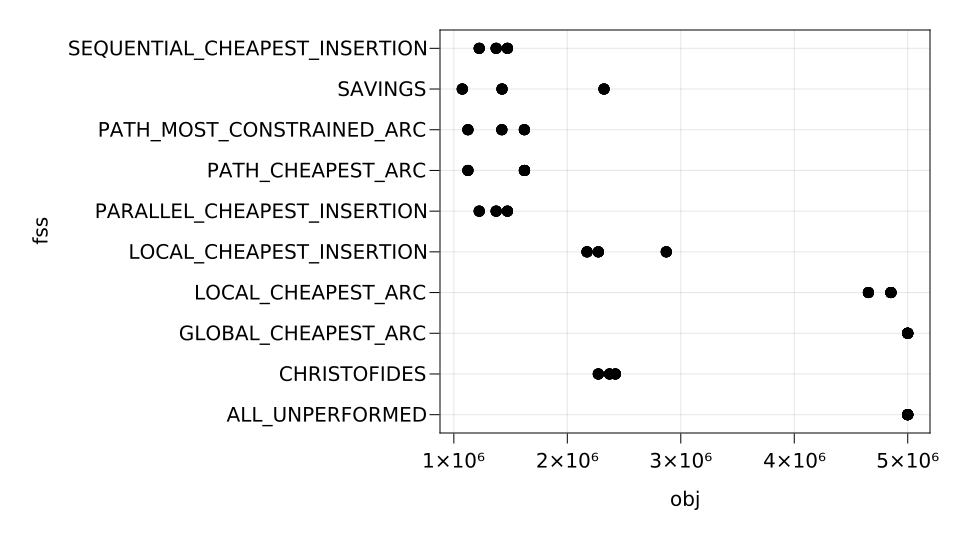

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [8]:
q = @linq df |>
    where(:iter .== 0)
data(q) * style(:obj, :fss) * spec(Scatter) |> draw

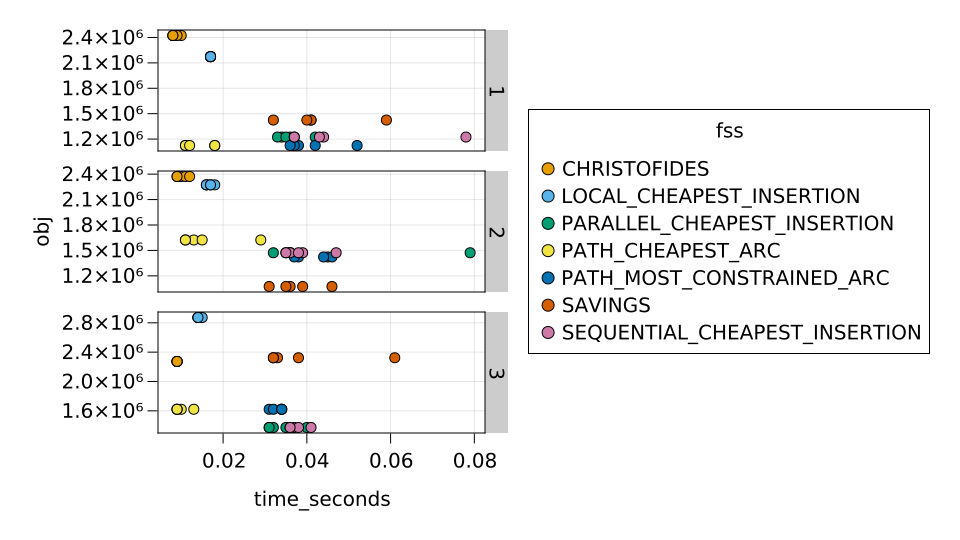

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [10]:
q = @linq df |>
    where(:iter .== 0) |>
    where(:obj .< 4e6)
data(q) * style(:time_seconds, :obj, layout_y = :instance => categorical, color=:fss => categorical) * spec(Scatter) |> draw

In [17]:
q = @linq df |>
    where(:fss .== "PATH_CHEAPEST_ARC") |> 
    where(:time_seconds .< 30)
newstyle = style(markersize = :obj) * spec(markersize = (10, 10))
data(q) * style(:time_seconds, :obj, layout_y = :instance => categorical, color=:lsm => categorical) * (spec(Scatter)*newstyle) |> draw

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [20]:
df2 = DataFrame(
    fss = String[],
    lsm = String[],
    iter = Int[],
    obj = Int[],
    time_seconds = Float64[],
)

,fss,lsm,iter,obj,time_seconds
,String,String,Int64,Int64,Float64


In [21]:
fss = ""
lsm = ""
for line in readlines("rerouting.log")
    if length(line) < 3
        continue
    end
    if line[1:3] == "FSS"
        fss = line[7:end]
    elseif line[1:3] == "LSM"
        lsm = line[7:end]
    else
        reg = r"Solution #(\d+) \((\d+),.+time = (\d+)"
        if occursin(reg, line)
            m = match(reg, line)
            push!(df2,(
                fss,
                lsm,
                parse(Int, m.captures[1]),
                parse(Int, m.captures[2]),
                parse(Int, m.captures[3])/1000,
            ))
        end
    end
end

In [53]:
df2

,fss,lsm,iter,obj,time
,String,String,Int64,Int64,Int64
1,ALL_UNPERFORMED,AUTOMATIC,0,970000,1
2,ALL_UNPERFORMED,AUTOMATIC,1,960489,51
3,ALL_UNPERFORMED,AUTOMATIC,2,951104,52
4,ALL_UNPERFORMED,AUTOMATIC,3,941327,53
5,ALL_UNPERFORMED,AUTOMATIC,4,931978,53
6,ALL_UNPERFORMED,AUTOMATIC,5,921727,54
7,ALL_UNPERFORMED,AUTOMATIC,6,911920,55
8,ALL_UNPERFORMED,AUTOMATIC,7,901899,57
9,ALL_UNPERFORMED,AUTOMATIC,8,891701,60


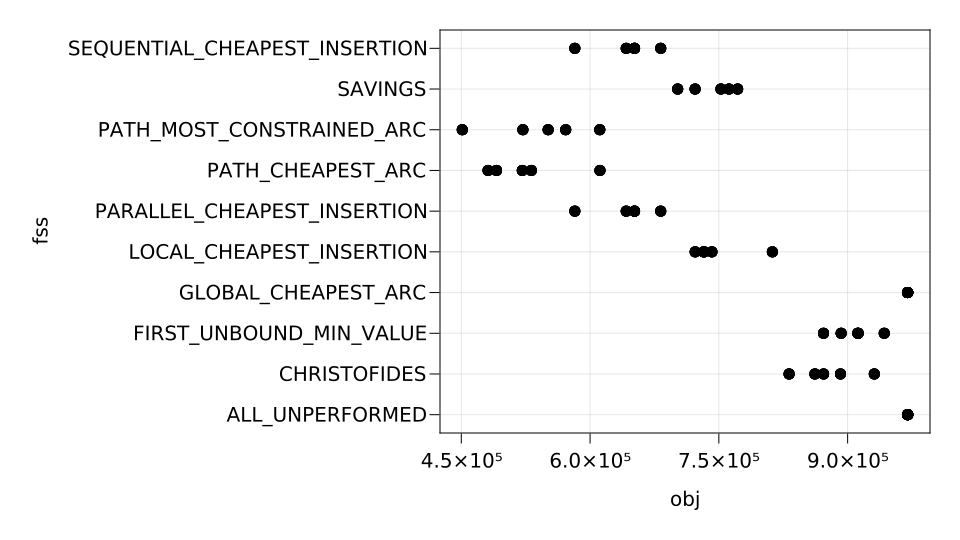

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [54]:
q = @linq df2 |>
    where(:iter .== 0)
data(q) * style(:obj, :fss) * spec(Scatter) |> draw

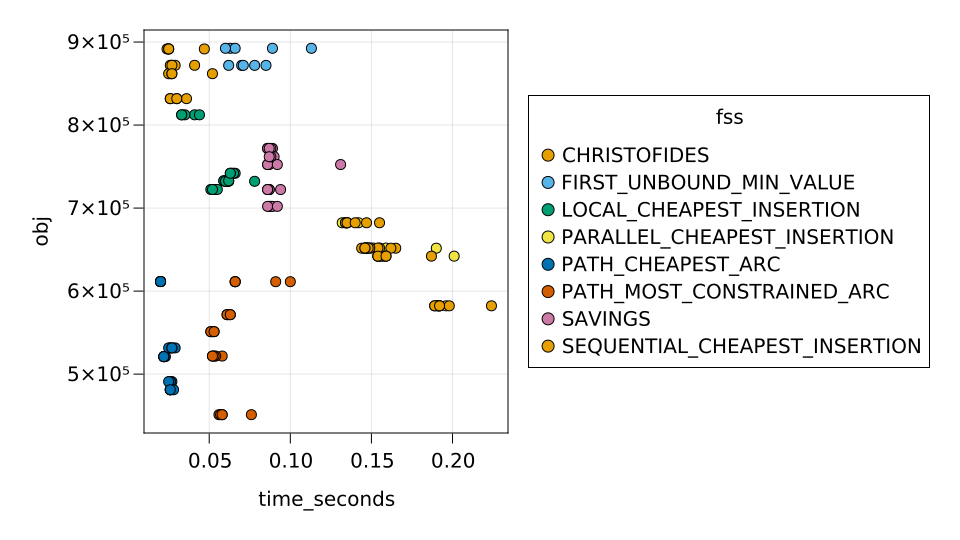

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [23]:
q = @linq df2 |>
    where(:iter .== 0) |>
    where(:obj .< 9e5)
data(q) * style(:time_seconds, :obj, color=:fss => categorical) * spec(Scatter) |> draw

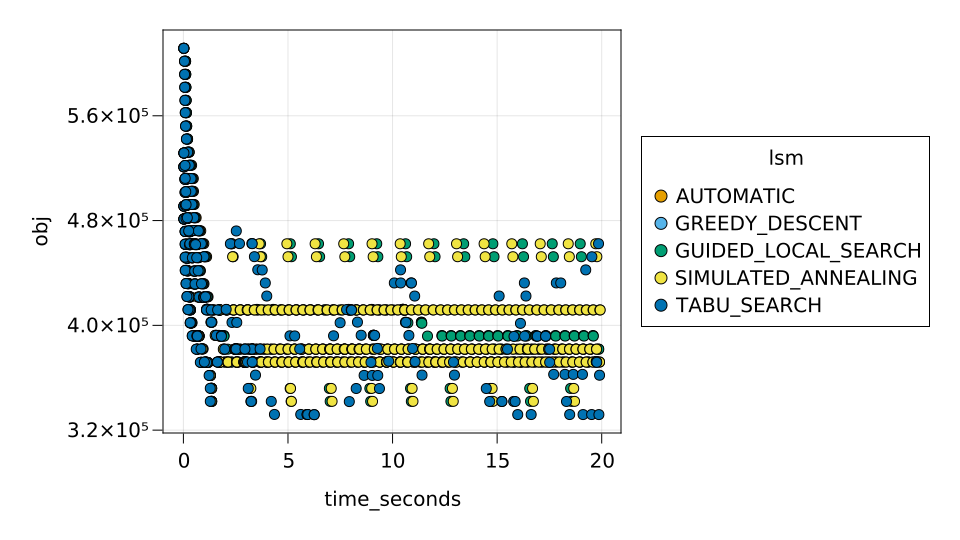

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /home/michael/.julia/packages/AbstractPlotting/T806p/src/display.jl:135


In [24]:
q = @linq df2 |>
    where(:fss .== "PATH_CHEAPEST_ARC") |>
    where(:time_seconds .< 5e3)
newstyle = style(markersize = :obj) * spec(markersize = (10, 10))
data(q) * style(:time_seconds, :obj, color=:lsm => categorical) * (spec(Scatter)*newstyle) |> draw

In [67]:
8000 / 1000

8.0